In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### Loading the data set

In [5]:
df=pd.read_csv('water_potability.csv')

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

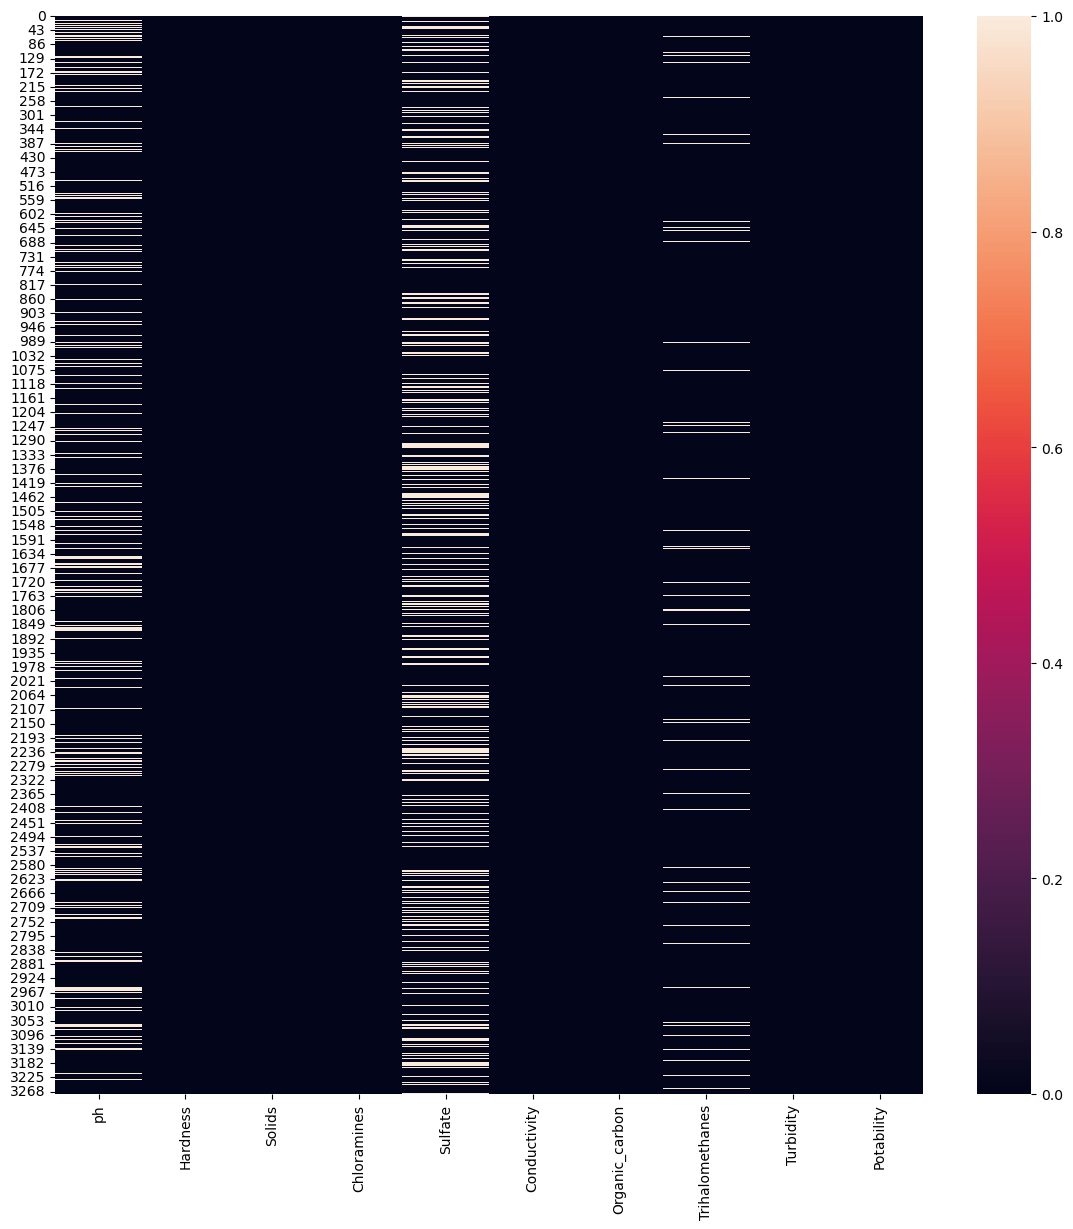

In [9]:
plt.figure(figsize=(14,14))
sns.heatmap(df.isna())

<AxesSubplot:>

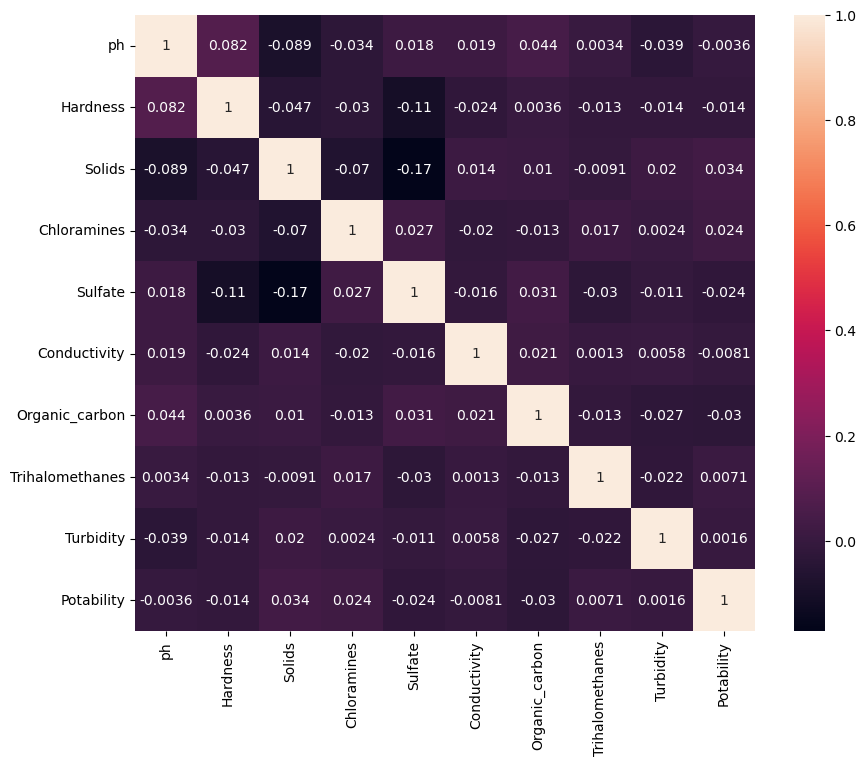

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Potability', ylabel='count'>

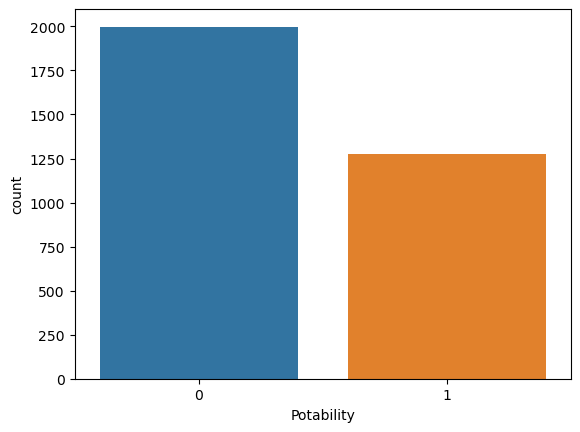

In [11]:
sns.countplot(x='Potability',data=df)

### checking for outlier



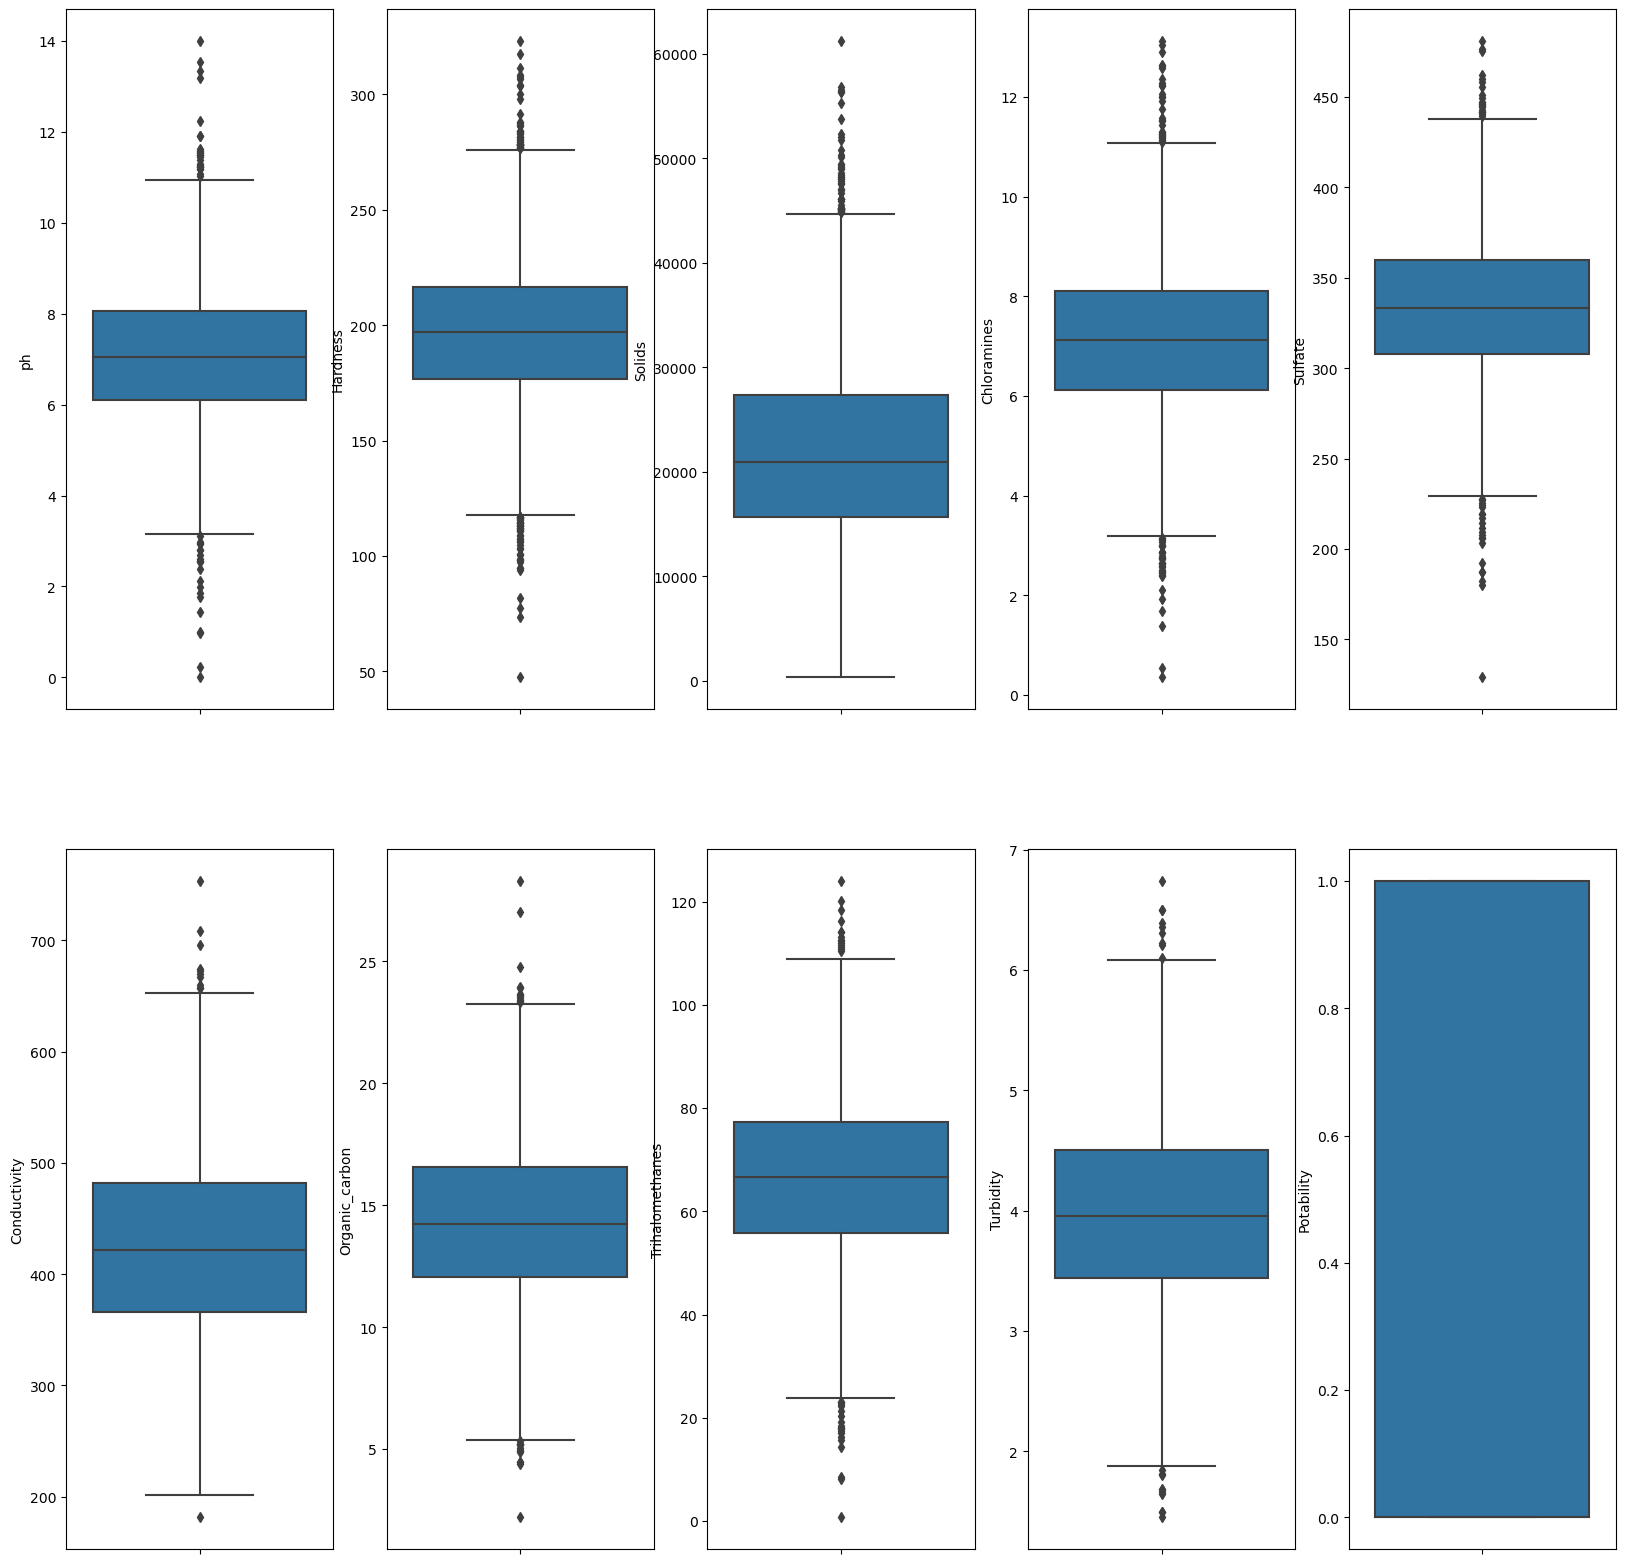

In [12]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,20))
ax=ax.flatten()
index=0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1

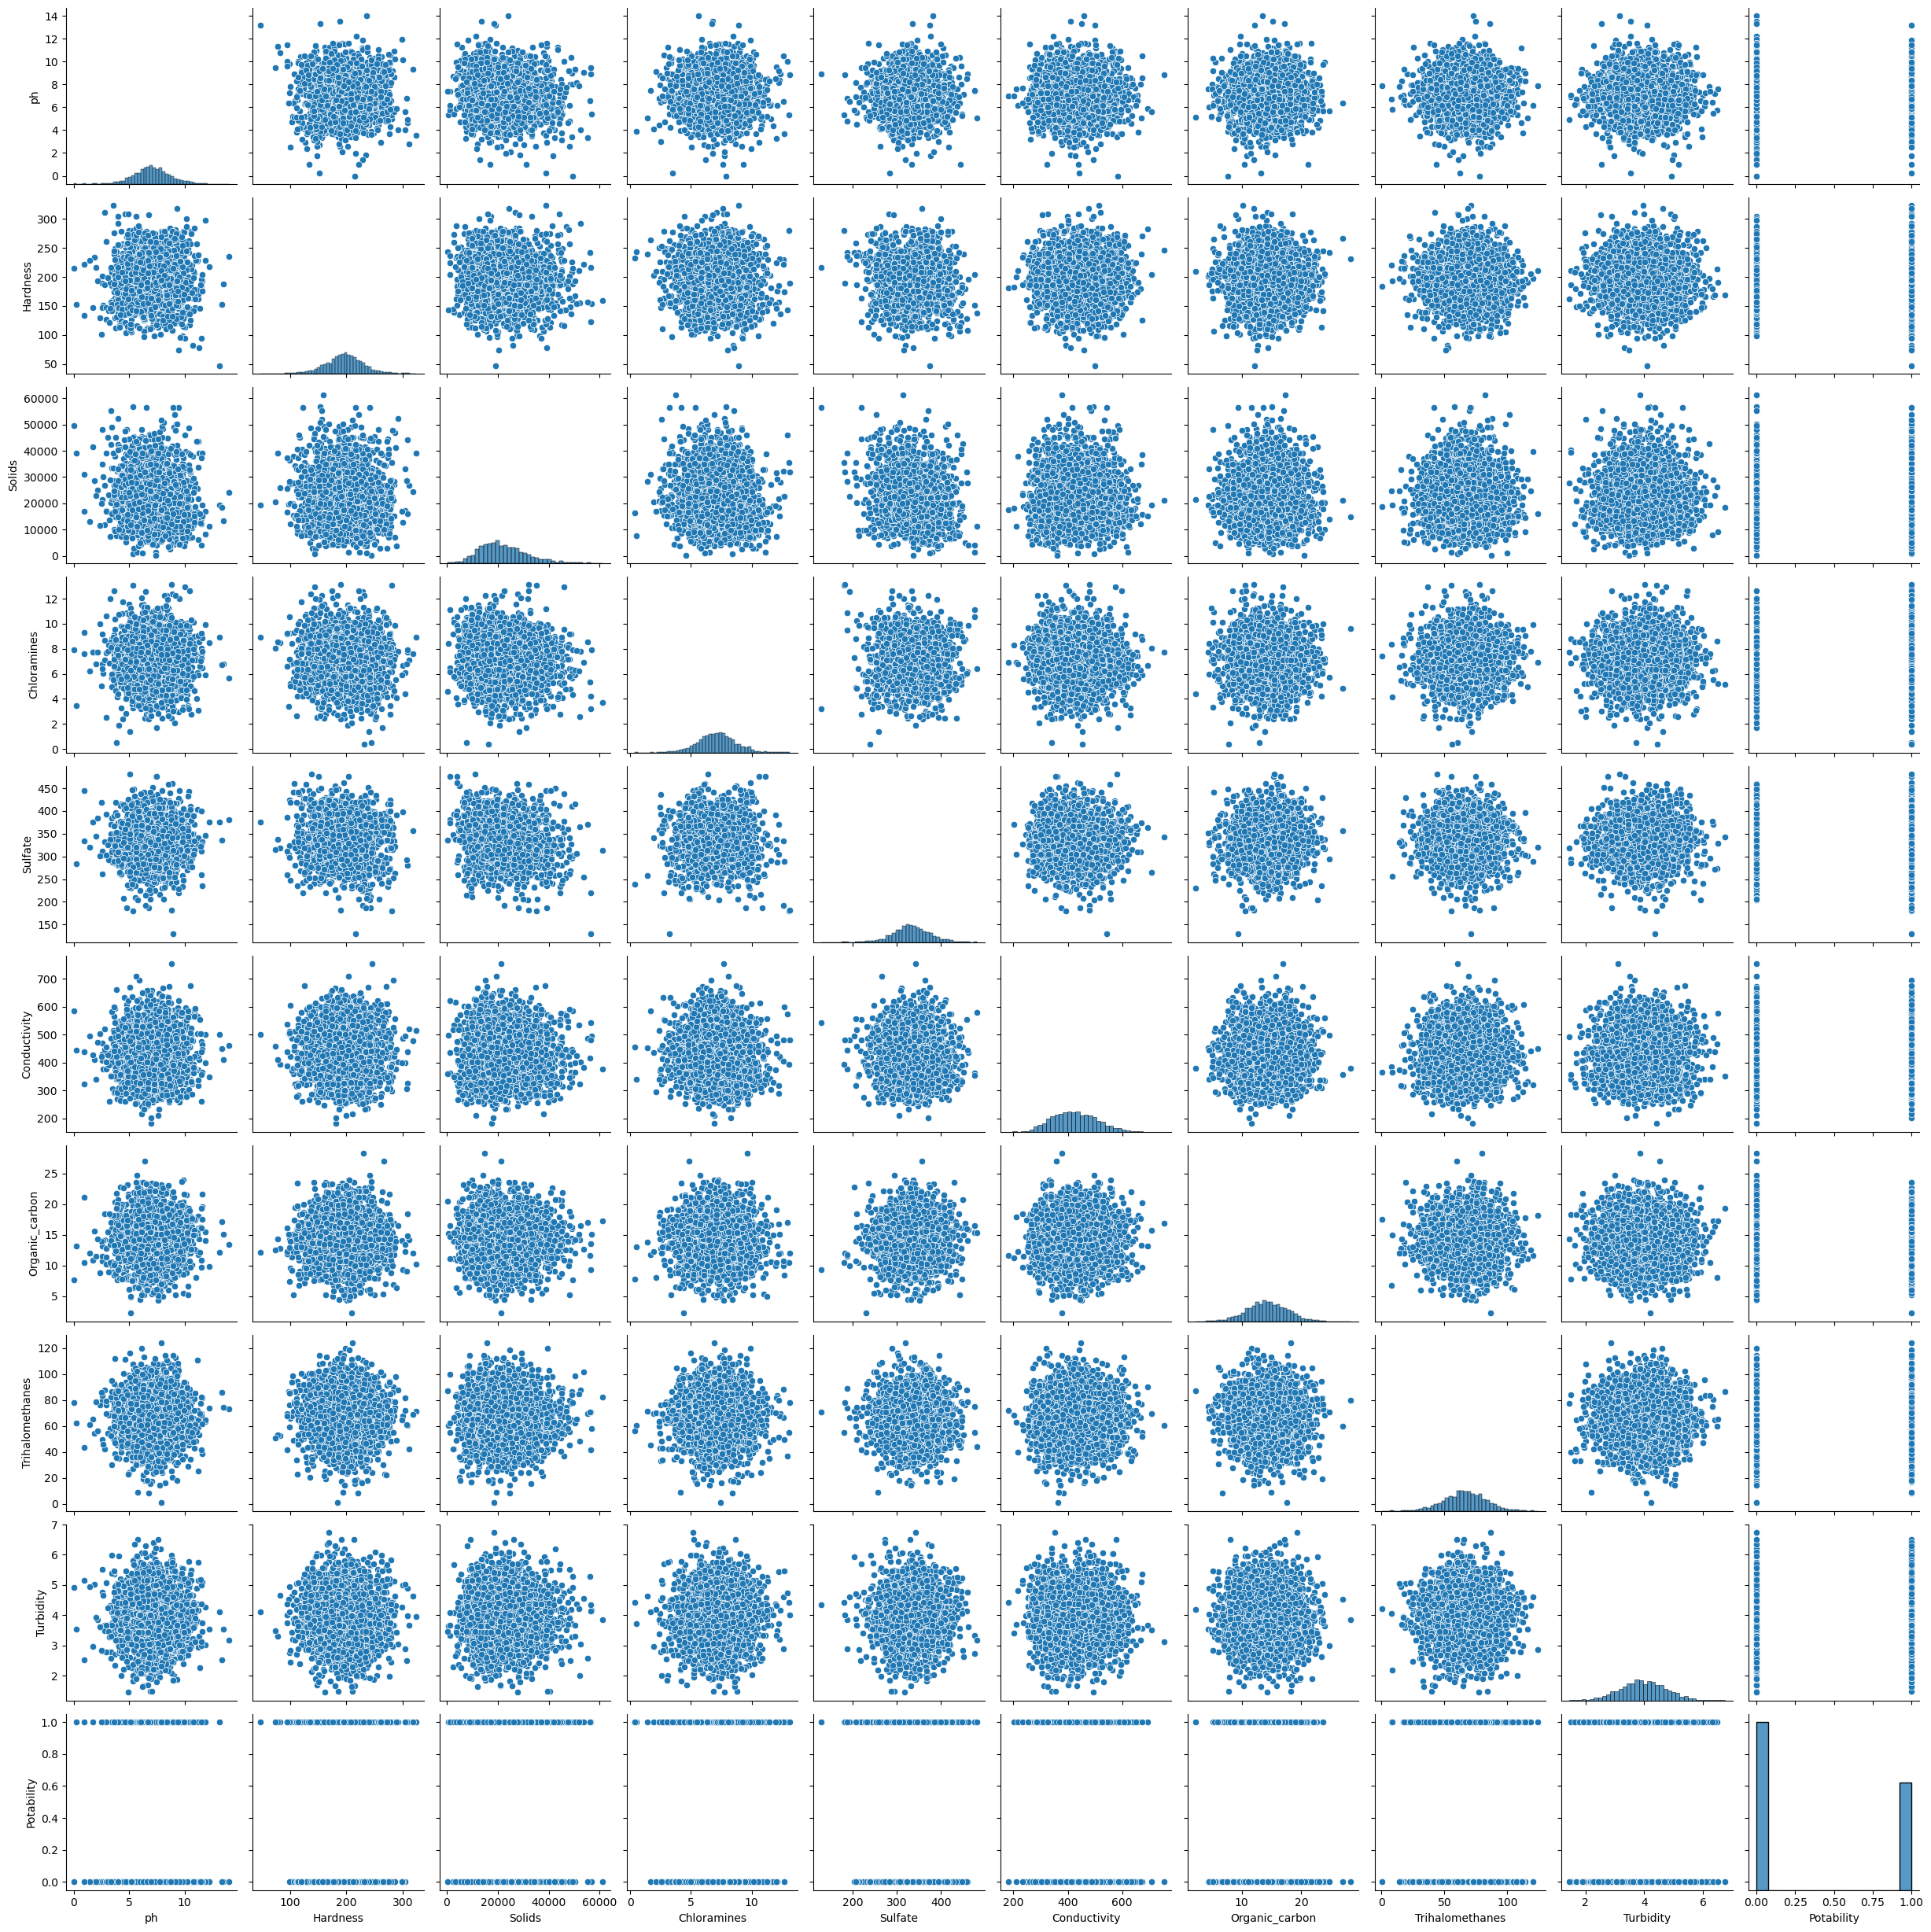

In [13]:
sns.pairplot(df)

### Filling na values

In [14]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [17]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

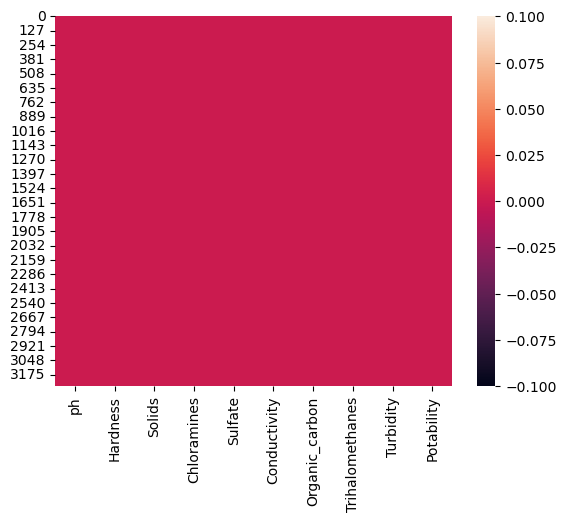

In [18]:
sns.heatmap(df.isna())

In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
x.shape,y.shape

((3276, 9), (3276,))

### Scaling the data

In [22]:
ss=StandardScaler()
x=ss.fit_transform(x)


### Splitting the data to train & test

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

##### Model building
## A. LogisticRegression


In [42]:
model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [43]:
model_LR.score(x_train,y_train)

0.6053435114503817

In [44]:
pred_lr=model_LR.predict(x_test)

#### Accuracy

In [48]:
acc_score_lr=accuracy_score(y_test,pred_lr)
print('The predicted score of LR model is',acc_score_lr)

The predicted score of LR model is 0.6280487804878049


In [50]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [51]:
print(confusion_matrix(y_test,pred_lr))

[[412   0]
 [244   0]]


# DecisionTreeClassifier

In [53]:
model_dt=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=10)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10)

In [54]:
model_dt.score(x_train,y_train)

0.6553435114503817

In [55]:
pred_dt=model_dt.predict(x_test)

In [56]:
acc_score_dt=accuracy_score(y_test,pred_dt)
print('The predicted score of DT model is',acc_score_dt)

The predicted score of DT model is 0.6310975609756098


In [57]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       412
           1       0.51      0.15      0.23       244

    accuracy                           0.63       656
   macro avg       0.58      0.53      0.49       656
weighted avg       0.60      0.63      0.56       656



In [58]:
print(confusion_matrix(y_test,pred_dt))

[[378  34]
 [208  36]]


# RandomForestClassifier


In [63]:
model_Rf=RandomForestClassifier()
model_Rf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
model_Rf.score(x_train,y_train)

1.0

In [65]:
pred_Rf=model_Rf.predict(x_test)

In [66]:
acc_score_Rf=accuracy_score(y_test,pred_Rf)
print('The predicted score of Rf model is',acc_score_Rf)

The predicted score of Rf model is 0.6859756097560976


In [67]:
print(classification_report(y_test,pred_Rf))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       412
           1       0.63      0.37      0.47       244

    accuracy                           0.69       656
   macro avg       0.67      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656



In [68]:
print(confusion_matrix(y_test,pred_Rf))

[[360  52]
 [154  90]]


# KNN

In [78]:
model_knn=KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [79]:
model_knn.score(x_train,y_train)

0.7110687022900763

In [80]:
pred_knn=model_knn.predict(x_test)

In [82]:
acc_score_knn=accuracy_score(y_test,pred_knn)

In [83]:
acc_score_knn

0.6524390243902439

In [85]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       412
           1       0.55      0.34      0.42       244

    accuracy                           0.65       656
   macro avg       0.62      0.59      0.59       656
weighted avg       0.63      0.65      0.63       656



In [86]:
print(confusion_matrix(y_test,pred_knn))

[[345  67]
 [161  83]]


# SVM

In [88]:
model_svm=SVC(kernel='rbf')
model_svm.fit(x_train,y_train)

SVC()

In [89]:
model_svm.score(x_train,y_train)

0.7377862595419847

In [90]:
pred_svm=model_svm.predict(x_test)

In [94]:
acc_svm=accuracy_score(y_test,pred_svm)
acc_svm

0.6951219512195121

In [95]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.69      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656



In [96]:
print(confusion_matrix(y_test,pred_svm))

[[377  35]
 [165  79]]


# all accuracy

In [109]:
models=pd.DataFrame({"MODEL":['LR','DT','KNN','SVM','RF'],
                    "ACCURACY":[acc_score_lr,acc_score_dt,acc_score_knn,acc_svm,acc_score_Rf]})

In [110]:
models

,MODEL,ACCURACY
0,LR,0.628049
1,DT,0.631098
2,KNN,0.652439
3,SVM,0.695122
4,RF,0.685976


In [123]:
models.sort_values(by='ACCURACY',ascending=False)

,MODEL,ACCURACY
3,SVM,0.695122
4,RF,0.685976
2,KNN,0.652439
1,DT,0.631098
0,LR,0.628049


<AxesSubplot:xlabel='MODEL', ylabel='ACCURACY'>

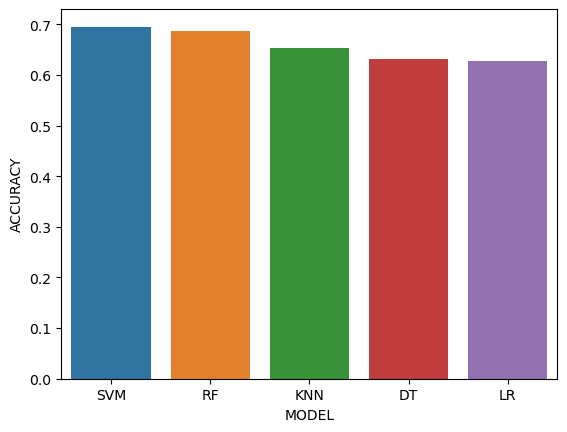

In [126]:
sns.barplot(x='MODEL',y='ACCURACY',data=models.sort_values(by='ACCURACY',ascending=False))

